# Music Genre Classification
## Dataset: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
## Roll Numbers : 20bce093, 20bce099, 20bce103, 20bce112, 20bce133



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
path_data = "/Users/jp/Semester-5/Machine Learning/Innovative_Assignment/20BCE093_099_103_112_133/features_3_sec.csv"
data = pd.read_csv(path_data, header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
1,blues.00000.0.wav,66149,0.3354063630104065,0.09104829281568527,0.1304050236940384,0.0035210042260587215,1773.0650319904662,167541.6308686573,1972.7443881356735,117335.77156332089,...,39.6871452331543,-3.2412803173065186,36.488243103027344,0.7222089767456055,38.099151611328125,-5.05033540725708,33.618072509765625,-0.24302679300308228,43.771766662597656,blues
2,blues.00000.1.wav,66149,0.3430653512477875,0.0861465260386467,0.1126992478966713,0.0014496854273602366,1816.6937765281948,90525.69086581325,2010.0515008132973,65671.87567304078,...,64.74827575683594,-6.055294036865234,40.67765426635742,0.1590154767036438,51.26409149169922,-2.8376989364624023,97.03083038330078,5.784063339233398,59.94308090209961,blues
3,blues.00000.2.wav,66149,0.34681475162506104,0.09224288910627365,0.13200338184833527,0.004620399326086044,1788.539718722745,111407.43761296556,2084.5651317448537,75124.92171573533,...,67.33656311035156,-1.7686097621917725,28.34857940673828,2.3787682056427,45.717647552490234,-1.9384244680404663,53.05083465576172,2.5173747539520264,33.10512161254883,blues
4,blues.00000.3.wav,66149,0.3636387884616852,0.08685615658760071,0.1325647234916687,0.0024475634563714266,1655.289045406881,111952.2845173748,1960.0399882877425,82913.63926860478,...,47.73945236206055,-3.8411545753479004,28.33711814880371,1.2185875177383423,34.77093505859375,-3.5803520679473877,50.83622360229492,3.630866050720215,32.023677825927734,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,rock.00099.5.wav,66149,0.34912624955177307,0.08051525801420212,0.050019219517707825,9.737338405102491e-05,1499.083005340734,164266.88644320655,1718.7072147023991,85931.57452328283,...,42.48598098754883,-9.094269752502441,38.326839447021484,-4.246976375579834,31.04983901977539,-5.625812530517578,48.80409240722656,1.8188226222991943,38.96696853637695,rock
9987,rock.00099.6.wav,66149,0.3725642263889313,0.08262579143047333,0.05789683386683464,8.768274710746482e-05,1847.9651284052807,281054.9359728023,1906.468492244977,99727.03705409801,...,32.41520309448242,-12.375725746154785,66.41858673095703,-3.08127760887146,54.41426467895508,-11.960546493530273,63.45225524902344,0.4288570284843445,18.697032928466797,rock
9988,rock.00099.7.wav,66149,0.3474808931350708,0.08901944011449814,0.05240287631750107,0.0007012603455223143,1346.1576591776088,662956.2463246662,1561.8590872190905,138762.84194453788,...,78.2281494140625,-2.5244827270507812,21.778993606567383,4.809936046600342,25.9808292388916,1.7756863832473755,48.58237838745117,-0.2995452880859375,41.58699035644531,rock
9989,rock.00099.8.wav,66149,0.38752731680870056,0.08481542766094208,0.06642989814281464,0.00032048573484644294,2084.5153267668607,203891.0391605285,2018.3662540689124,22860.992561938132,...,28.32374382019043,-5.3635406494140625,17.209941864013672,6.462601184844971,21.442928314208984,2.354764699935913,24.843612670898438,0.6758241057395935,12.787750244140625,rock


In [5]:
# Seperating data and labels
metadata_pd = data.iloc[1:,1:-2]
label_pd = data.iloc[1:,-1]

metadata = metadata_pd.to_numpy()
label = label_pd.to_numpy()

# Standardizing
standardized_metadata = StandardScaler().fit_transform(metadata)
standardized_metadata.shape

(9990, 57)

In [7]:
# Function used for parameter tuning.
def parameter_tuning(clf, metadata, label, param_grid):
  grid = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring='accuracy',
                      verbose=2,
                      cv = 2,
                      n_jobs=-1,
                      refit=False
                      )
  
  # Inputing the data onto the grid search
  grid_result = grid.fit(metadata, label)

  # Displaying the best score with its corrsponding parameters
  print('Best Score: ', grid_result.best_score_)
  print('Best Params: ', grid_result.best_params_)

# Function used for displaying confusion matrix.
def display_confusionMatrix(clf, X, y, title):
  cm = confusion_matrix(y, clf.predict(X), labels=clf.classes_)
  normed_c = (cm.T / cm.astype(float).sum(axis=1)).T
  disp = ConfusionMatrixDisplay(confusion_matrix=normed_c,
                                display_labels=clf.classes_)
  fig,ax=plt.subplots(figsize=(10,10))
  disp.plot(
      cmap=plt.cm.Blues,
      ax=ax
      )
  disp.ax_.set_title(title + " Confusion Matrix:")

In [9]:
# Different types of classifiers. 

# Classifier Decision Tree
classifier_dt = DecisionTreeClassifier()
title_dt = "Decision Tree"


# Classifier Support Vector Machine with Kernal as 'rbf' (SVC)
classifier_svc = SVC(max_iter=1000)
title_svc = "Support Vector Machine"


# Classifier K-Nearest Neighbors (KN)
classifier_kn = KNeighborsClassifier(n_neighbors=70)
title_kn = "K-Nearest Neighbors"


# Classifier Naive Bayes (NB)
classifier_nb = GaussianNB()
title_nb = "Naive Bayes"

# Classifier Multi-Layer-Perceptron (MLP)
classifier_mlp = MLPClassifier(
    hidden_layer_sizes=100
    , activation="logistic"
    , solver="sgd"
    , max_iter=1000
    )
title_mlp = "Multi-Layer-Perceptron"

# List of classifiers
classifiers = [
               classifier_dt
               , classifier_kn
               , classifier_mlp
               , classifier_nb
               , classifier_svc
]

# List of titles
titles = [
          title_dt
          , title_kn
          , title_mlp
          , title_nb
          , title_svc
]

<Figure size 640x480 with 0 Axes>

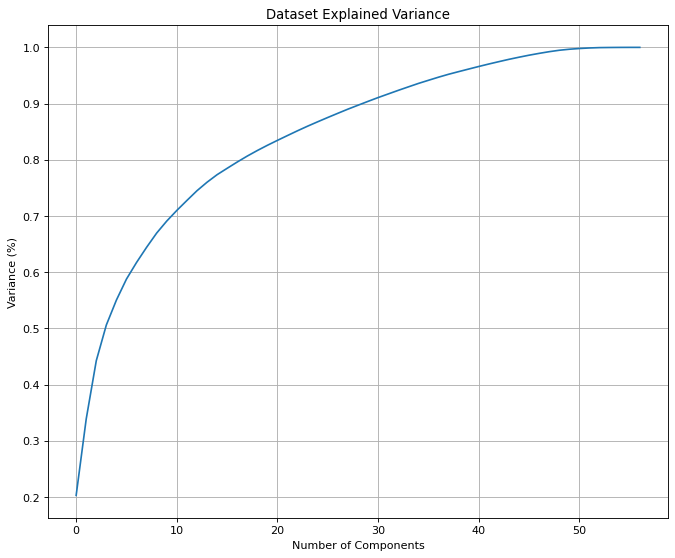

In [11]:
#Fitting the PCA algorithm with the Data
pca = PCA().fit(standardized_metadata)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid()
plt.show()

In [13]:
pca = PCA(0.85)
pca_metadata = pca.fit_transform(standardized_metadata)
print(pca_metadata)

[[-1.82190386  0.41002131  0.72113854 ... -0.71552576  0.63039619
   0.23317004]
 [-2.70275378  0.12989892  1.55418987 ... -0.32495742 -0.383706
   0.18239653]
 [-1.81423243  0.11160607  0.53475399 ... -0.05043178 -0.11366122
  -0.4635625 ]
 ...
 [ 1.3139864   2.82084551  1.32584848 ... -1.09841183  0.00640186
   0.03662086]
 [-4.22261069 -0.95808634  0.5818598  ... -0.80354002 -0.43265706
  -0.1307616 ]
 [-2.50628651  0.84298994  1.04894303 ... -1.20177122  0.47706755
  -0.40557598]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
      pca_metadata 
      , label 
      , test_size=0.3
      , random_state=42
      , shuffle=True
      )

In [17]:
# Fitting training data on-to the classifiers
for clf, title in zip(classifiers, titles):
  clf.fit(X_train, y_train)
  print(title + " Accuracy Score:", round(clf.score(X_test, y_test), 2))

Decision Tree Accuracy Score: 0.58
K-Nearest Neighbors Accuracy Score: 0.68
Multi-Layer-Perceptron Accuracy Score: 0.65
Naive Bayes Accuracy Score: 0.52
Support Vector Machine Accuracy Score: 0.79


In [ ]:
tree.plot_tree(classifier_dt)

[Text(0.6612091810057991, 0.9791666666666666, 'x[1] <= 2.445\ngini = 0.9\nsamples = 6993\nvalue = [681, 690, 711, 698, 687, 714, 697, 733, 684, 698]'),
 Text(0.43406766921760626, 0.9375, 'x[0] <= 1.109\ngini = 0.889\nsamples = 5513\nvalue = [412, 110, 530, 693, 676, 402, 696, 688, 634, 672]'),
 Text(0.17249708860157809, 0.8958333333333334, 'x[1] <= -2.944\ngini = 0.871\nsamples = 3487\nvalue = [374.0, 108.0, 430.0, 466.0, 236.0, 359.0, 677.0, 76.0\n179.0, 582.0]'),
 Text(0.03215847514022246, 0.8541666666666666, 'x[0] <= -1.314\ngini = 0.584\nsamples = 620\nvalue = [35, 0, 14, 86, 51, 3, 384, 8, 6, 33]'),
 Text(0.01701207339100675, 0.8125, 'x[15] <= 0.229\ngini = 0.448\nsamples = 500\nvalue = [35, 0, 3, 49, 27, 2, 365, 0, 0, 19]'),
 Text(0.007633805494818899, 0.7708333333333334, 'x[1] <= -3.781\ngini = 0.317\nsamples = 381\nvalue = [21, 0, 3, 10, 19, 1, 313, 0, 0, 14]'),
 Text(0.0027379028424755203, 0.7291666666666666, 'x[8] <= -1.697\ngini = 0.125\nsamples = 215\nvalue = [4, 0, 0, 4, 5

In [53]:
# Classification reports of the best classifiers

# MLP
print(title_mlp + " Classification Report:")
print(classification_report(y_test, classifier_mlp.predict(X_test)))

# KNN
print(title_kn + " Classification Report:")
print(classification_report(y_test, classifier_kn.predict(X_test)))

# SVC
print(title_svc + " Classification Report:")
print(classification_report(y_test, classifier_svc.predict(X_test)))

Multi-Layer-Perceptron Classification Report:
              precision    recall  f1-score   support

       blues       0.64      0.65      0.64       319
   classical       0.85      0.90      0.87       308
     country       0.56      0.59      0.57       286
       disco       0.55      0.49      0.52       301
      hiphop       0.72      0.63      0.67       311
        jazz       0.72      0.76      0.74       286
       metal       0.72      0.86      0.78       303
         pop       0.69      0.82      0.75       267
      reggae       0.65      0.63      0.64       316
        rock       0.47      0.33      0.39       300

    accuracy                           0.66      2997
   macro avg       0.66      0.67      0.66      2997
weighted avg       0.66      0.66      0.66      2997

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

       blues       0.76      0.59      0.66       319
   classical       0.83      0.93      0.87

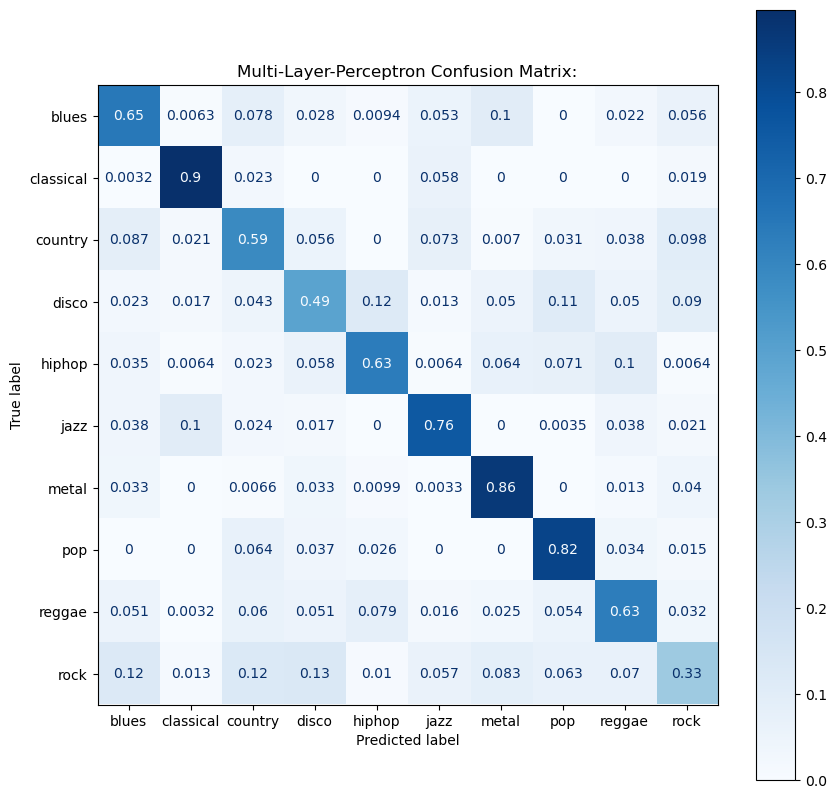

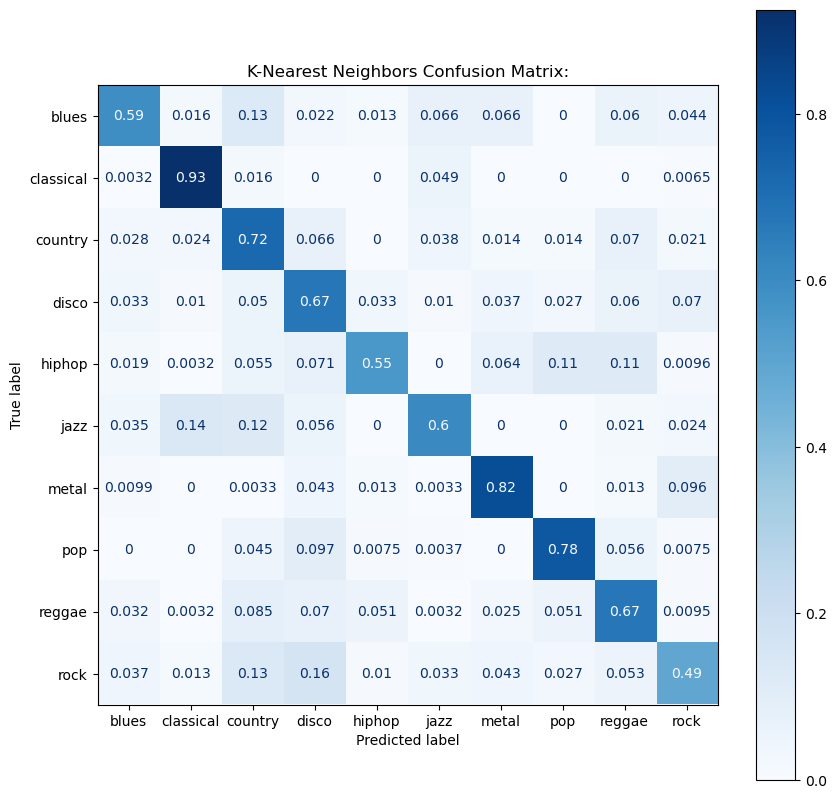

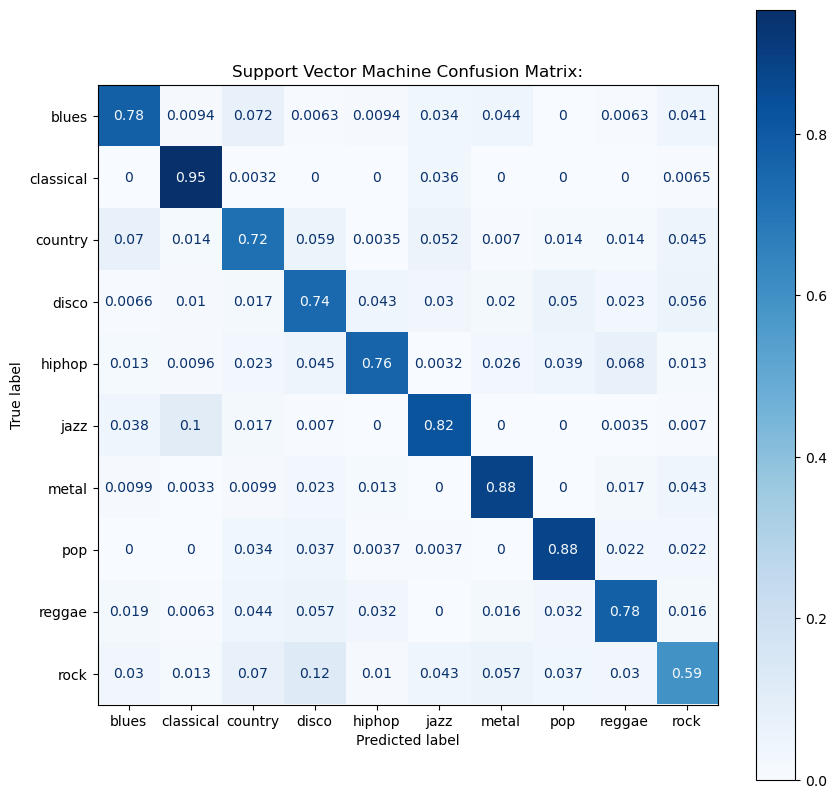

In [55]:
# Confusion Matrix of the best classifiers.

# MLP
display_confusionMatrix(classifier_mlp, X_test, y_test, title_mlp)

# KNN
display_confusionMatrix(classifier_kn, X_test, y_test, title_kn)

# SVC
display_confusionMatrix(classifier_svc, X_test, y_test, title_svc)